# Tutorial on Nilearn Plotting utilities

## In this tutorial, we show how to use plotting tools from Nilearn package for an easy visualization of Neuroimaging datasets and statistical analysis results.

In [1]:
%matplotlib inline

## General guidelines

### Plotting files and in-memory objects

* Nilearn can plot any human brain images which are in standard Nifti files, or example, .nii or .nii.gz. All the nilearn functions accept filename of the Nifti image, loading it for you, or a in-memory nifti image.

In [2]:
#Use nilearn to retrieve an in-memory object
from nilearn import datasets

template_img = datasets.load_mni152_template()
print(template_img) # Easily see the information of the image affine, shape, type of image, etc.

<class 'nibabel.nifti1.Nifti1Image'>
data shape (91, 109, 91)
affine: 
[[  -2.    0.    0.   90.]
 [   0.    2.    0. -126.]
 [   0.    0.    2.  -72.]
 [   0.    0.    0.    1.]]
metadata:
<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : 
db_name         : 
extents         : 0
session_error   : 0
regular         : r
dim_info        : 0
dim             : [  3  91 109  91   1   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : int16
bitpix          : 16
slice_start     : 0
pixdim          : [-1.  2.  2.  2.  1.  1.  1.  1.]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 10
cal_max         : 8000.0
cal_min         : 3000.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : FSL3.3
aux_file        : 
qform_code      : mni
sform_code      : mni


In [3]:
# Retrieve a filename
haxby_data = datasets.fetch_haxby()

# Get the functional data file names
print(haxby_data['func'])

['/home/kamalakar/nilearn_data/haxby2001/subj1/bold.nii.gz']


### A few conventions

* Nilearn plotting tools by default uses standard anatomical Montreal Neurological Image (MNI) template brain image as a background, same template as used in SPM & FSL software. To be well overlay on any mask image or statistical map, the image should be realigned to MNI space. One easy identification whether image is in MNI space or not, is to check the coordinates of (x, y, z) = (0, 0, 0) to be aligned with the anterior / posterior commissural line (AC/PC line) as shown in below demonstration.

* On the other hand, Nilearn does not provide interactive visualization of functional images (3D + t) like in other softwares.

# Plotting tools 

## Nilearn provides set of tools designed specifically to visualize Brain volumes such as anatomical/structural images, functional /EPI images, Region of Interest (roi) images, statistical maps, statistical maps overlayed on glass brain image as background, 4D atlas maps, connectomes between brain regions.

# Plotting Anatomical images `plot_anat`

We show here, how to plot anatomical image using tool: `plotting.plot_anat`

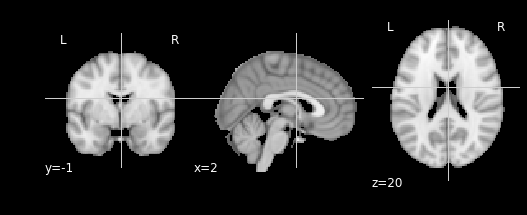

In [4]:
# First, we fetch and load the default anatomical image available in Nilearn datasets module
from nilearn import datasets

# default MNI152 template
anatomical_image = datasets.load_mni152_template()

# Then, import plotting module from nilearn to easily visualize the loaded image
from nilearn import plotting

# To plot anatomical image
plotting.plot_anat(anatomical_image)

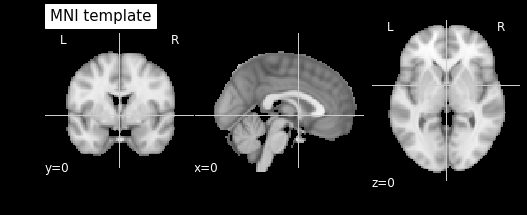

In [55]:
# We can control a bit more the details
plotting.plot_anat(anatomical_image, cut_coords=[0, 0, 0], title='MNI template')
plotting.plot_anat?

#### By default, all images are displayed in three directional mode 'x', 'y', 'z' corresponds to 'sagittal', 'coronal', 'axial' unless there is a change in parameter from display_mode='ortho' to specific unidirectional display_mode='x' or display_mode='xz' or 'yz' (two directional)

# Plotting raw functional images `plot_epi`

We show here, how to plot raw functional brain images using tool: `plotting.plot_epi`.

In [6]:
# First, we fetch and load the functional images available in Nilearn datasets module
# No need to import again since we imported datasets module on top

# Loading functional images of only one subject
data = datasets.fetch_haxby(n_subjects=1)

# Raw functional image filename
functional_filename = data.func[0] # path of the single subject image with .nii.gz
print(functional_filename)

/home/kamalakar/nilearn_data/haxby2001/subj1/bold.nii.gz


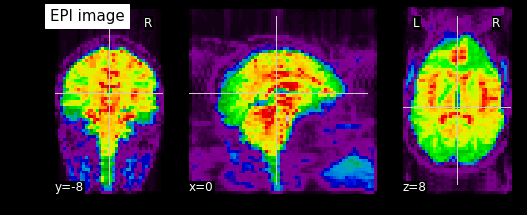

In [22]:
# We compute the mean of the image from (x, y, z, t) bold image to (x, y, z), averaging in time domain
from nilearn.image import mean_img

mean_functional_image = mean_img(functional_filename)

# Visualizing mean of the single functional image
plotting.plot_epi(mean_functional_image, title='EPI image')

#### By default, the coordinates in three directional mode 'x', 'y', 'z' are chosen automatically no need of explicitly specifying them.

# Plotting Statistical images `plot_stat_map`

In this section, we show how to use `plotting.plot_stat_map` to visualize statistical results overlayed onto aligned to specific anatomical images or default MNI template. Most suitable images are Z-map, T-map, ICA statistical maps.

In this setting, we show the t-contrast maps obtained from task fMRI datasets during a left vs right button press on its own subject specific anatomical image.

In [10]:
# Fetch t-contrasts maps from Nilearn datasets module
localizer_dataset = datasets.fetch_localizer_contrasts(
    ["left vs right button press"],
    n_subjects=2,
    get_anats=True,
    get_tmaps=True)
# Anatomical image filename
localizer_anat_filename = localizer_dataset.anats[1]
print(localizer_anat_filename)
# T-contrast map filename
localizer_tmap_filename = localizer_dataset.tmaps[1]
print(localizer_tmap_filename)

/home/kamalakar/nilearn_data/brainomics_localizer/brainomics_data/S02/normalized_T1_anat_defaced.nii.gz
/home/kamalakar/nilearn_data/brainomics_localizer/brainomics_data/S02/t_map_left_auditory_&_visual_click_vs_right_auditory&visual_click.nii.gz


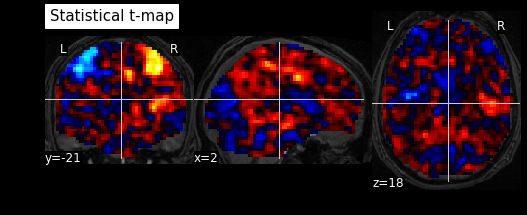

In [27]:
# Visualize statistical t-map on its anatomical image

plotting.plot_stat_map(localizer_tmap_filename, bg_img=localizer_anat_filename,
                       title="Statistical t-map", colorbar=False)

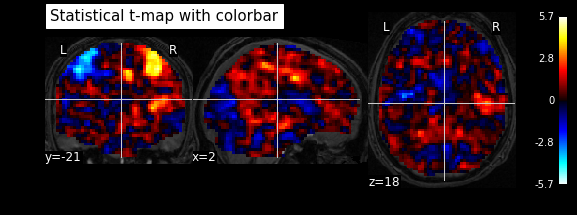

In [62]:
# We focus on changing some interesting parameters

# Visualize statistical t-map on its anatomical image with colorbar
# (default True)
plotting.plot_stat_map(localizer_tmap_filename, bg_img=localizer_anat_filename,
                       title="Statistical t-map with colorbar")

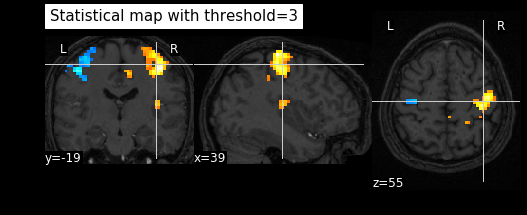

In [32]:
# Visualizing t-map with `threshold=3` based on its statistical intensities
plotting.plot_stat_map(localizer_tmap_filename, bg_img=localizer_anat_filename,
                       threshold=3, colorbar=False,
                       title="Statistical map with threshold=3")

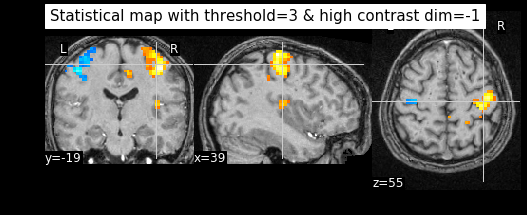

In [36]:
# Visualizing t-map with `threshold=3` and with high contrast dim=-1
plotting.plot_stat_map(localizer_tmap_filename, bg_img=localizer_anat_filename,
                       threshold=3, colorbar=False, dim=-1,
                       title="Statistical map with threshold=3 & high contrast dim=-1")

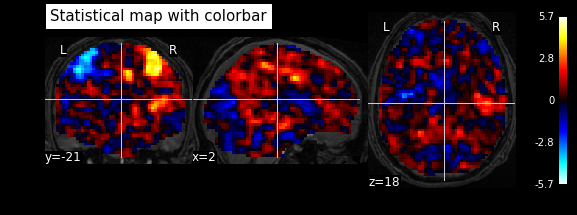

In [56]:
# Now, we visualize t-map with colorbar (by default)
plotting.plot_stat_map(localizer_tmap_filename, bg_img=localizer_anat_filename,
                       title="Statistical map with colorbar")

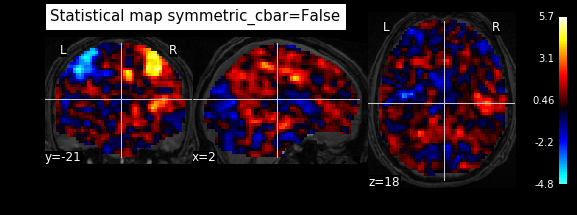

In [57]:
# Now, we visualize t-map with symmetric_cbar=False
plotting.plot_stat_map(localizer_tmap_filename, bg_img=localizer_anat_filename,
                       title="Statistical map symmetric_cbar=False",
                       symmetric_cbar=False)

More information on colorbar intensity displays, playing with parameter 'symmetric_cbar'.
By default symmetric_cbar='auto' which means colorbar range displays from -vmax to vmax as you can see in the top two plots. By switching symmetric_cbar to False means that colorbar range now displays from vmax and vmin as seen in bottom plot.

# Plotting statistical results using glass brain image `plot_glass_brain`

In this setting, we show the t-contrast maps obtained from task fMRI datasets during a left vs right button press overlayed on cool glass brain schematics image. `plotting.plot_glass_brain` will be used here.

Note: Here, background image is not needed since background image is always brain schematic image and statistical map should be normalized to MNI brain space to be aligned properly.

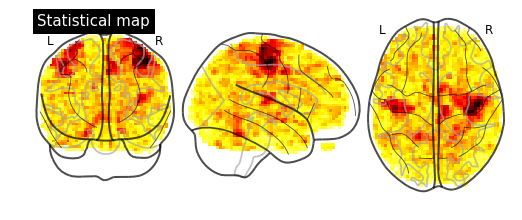

In [53]:
# Visualizing t-map with glass brain as background image
plotting.plot_glass_brain(localizer_tmap_filename, title="Statistical map")
plotting.plot_glass_brain?

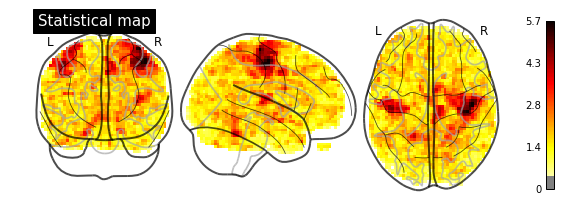

In [60]:
# Visualizing t-map with glass brain as background image
plotting.plot_glass_brain(localizer_tmap_filename, colorbar=True,
                          title="Statistical map with colorbar")

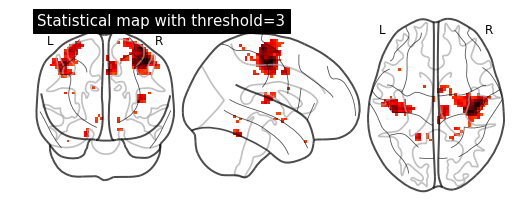

In [61]:
# Visualizing t-map with `threshold=3` based on its statistical intensities
plotting.plot_glass_brain(localizer_tmap_filename, threshold=3,
                          title="Statistical map with threshold=3")

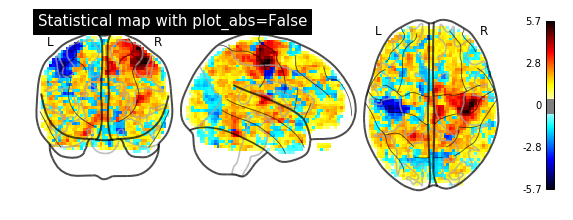

In [50]:
# Visualizing with plot_abs=False
plotting.plot_glass_brain(localizer_tmap_filename, colorbar=True,
                          plot_abs=False, title='Statistical map with plot_abs=False')

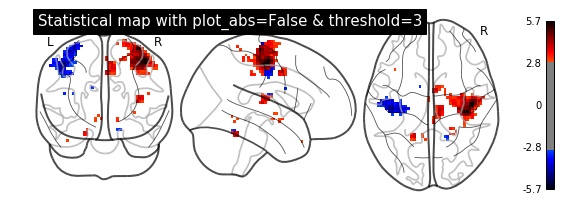

In [64]:
# Visualizing with plot_abs=False & threshold=3
plotting.plot_glass_brain(localizer_tmap_filename, threshold=3,
                          plot_abs=False, colorbar=True,
                          title='Statistical map with plot_abs=False & threshold=3')

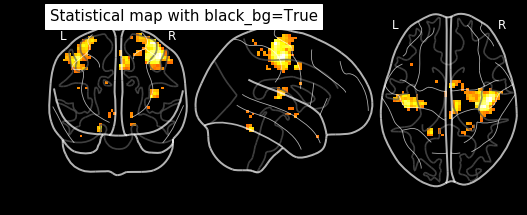

In [18]:
# Visualizing with background color to black by black_bg=True
plotting.plot_glass_brain(localizer_tmap_filename, threshold=3, black_bg=True,
                          title='Statistical map with black_bg=True')

More notes on parameter 'plot_abs'. By default plot_abs=True which means that maximum intensity projection of positive and negative values will be in the same manner. If plot_abs=False, then the sign of the maximum intensity will be represented with different colors as shown in 4th plot compared with the rest of the plots.

# Plotting a 4D image  with `plot_stat_map`: ICA results

We show here, how to visualize Independent Component Analysis (ICA) results in 4D on default standard template using `plotting.plot_stat_map`.

In this use case, we make use of Nilearn function `nilearn.image.index_img` which drop downs the 4D maps image in (x, y, z, ica_map) to 3D map image (x, y, z) corresponding to 4th dimension specific ica map.

Note: index starts with 0 not 1. 

(91, 109, 91, 10)


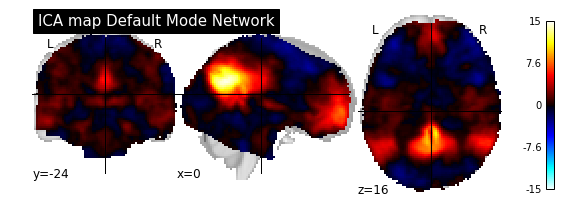

In [69]:
ica_atlas = datasets.fetch_atlas_smith_2009()

from nilearn.image import index_img

# Visualizing ica map of index 3
ica_maps = ica_atlas.rsn10

from nilearn._utils import check_niimg
print(check_niimg(ica_maps).shape)

ica_3 = index_img(ica_maps, 3)
plotting.plot_stat_map(ica_3, title='ICA map Default Mode Network')

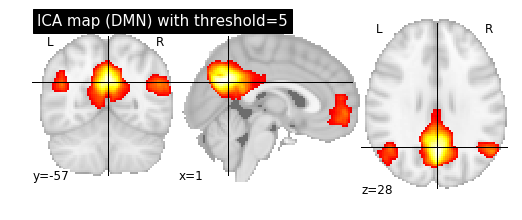

In [70]:
# Visualizing ica map with threshold=5
plotting.plot_stat_map(ica_3, threshold=5,
                       title='ICA map (DMN) with threshold=5',
                       colorbar=False)

Also, we show another very useful Nilearn function `nilearn.image.iter_img` which iterates over all ica maps in 4th dimension and visualizes 3D image for each dimension.

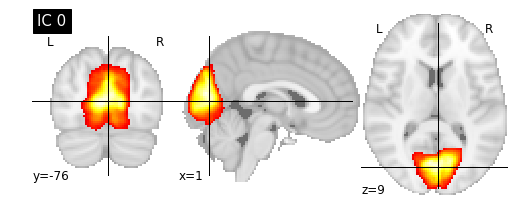

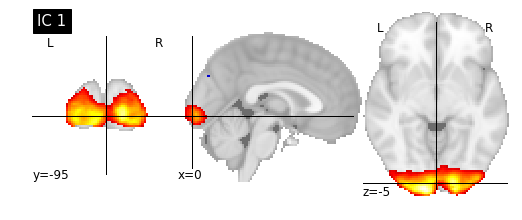

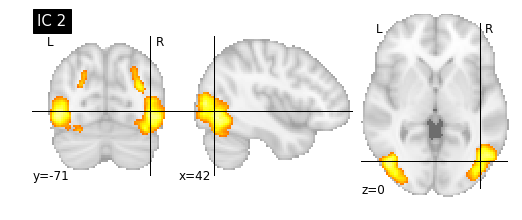

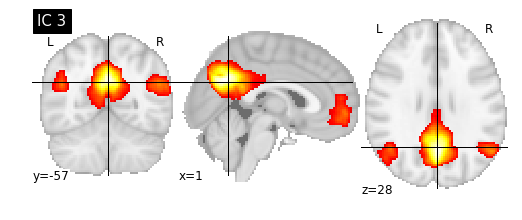

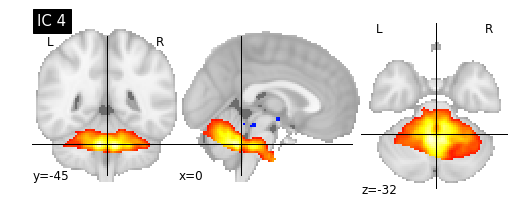

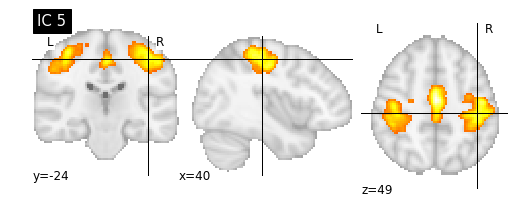

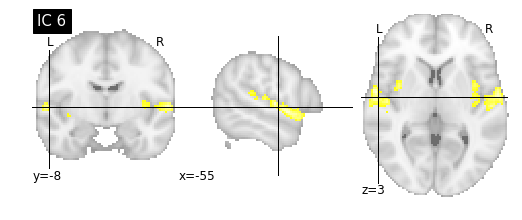

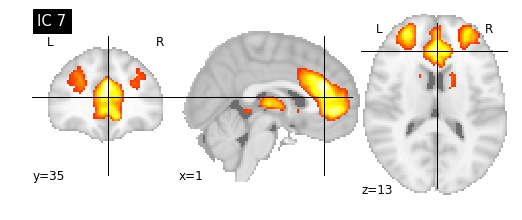

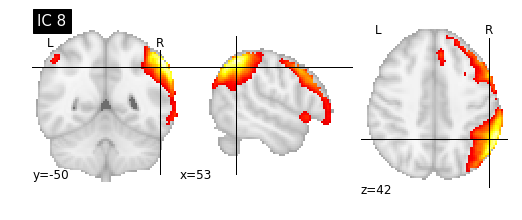

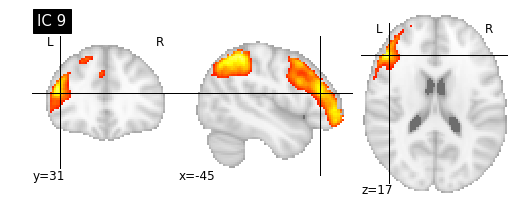

In [72]:
from nilearn.image import iter_img

# Visualizing ICA maps by iterating over 4th dimension using display_mode='z'
# and cut_coords=1 since we are choosing in only one directional mode
for i, each_map in enumerate(iter_img(ica_maps)):
    plotting.plot_stat_map(each_map, title="IC %d" % i,
                           colorbar=False, threshold=5)

# Plotting 4D atlas maps in 4D `plot_prob_atlas`

We show here, how to plot 4D atlas maps onto standard MNI template by default using tool: `plotting.plot_prob_atlas`.

The trick is to use `nilearn.image.iter_img` to get a set of 3D images from a 4D images

We make use of standard brain atlases available in Nilearn for easy visualization of any 4D maps (x, y, z, n_maps) without necessarily using for loop on each 4th dimensional index. Three different view_types are shown here with colors automatically chosen by itself. 

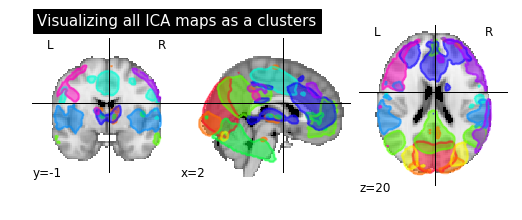

In [74]:
# Visualizing ICA maps with view_type='filled_contours'
plotting.plot_prob_atlas(maps_img=ica_maps, view_type='filled_contours',
                         title='Visualizing all ICA maps as a clusters')

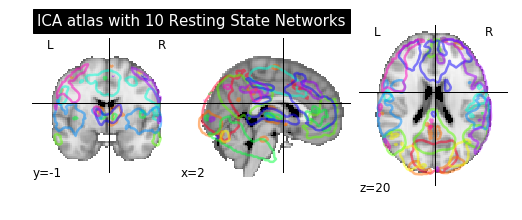

In [21]:
# Visualizing ICA maps with view_type='contours'
plotting.plot_prob_atlas(maps_img=ica_maps, view_type='contours',
                         title='Visualizing all ICA maps as contours')

/home/kamalakar/anaconda/lib/python2.7/site-packages/numpy/ma/core.py:4089: UserWarning: Warning: converting a masked element to nan.
  warnings.warn("Warning: converting a masked element to nan.")


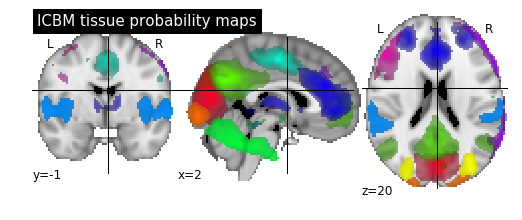

In [75]:
# Visualizing ICA maps with view_type='continuous'
plotting.plot_prob_atlas(maps_img=ica_maps, view_type='continuous',
                         title='Visualizing all ICA maps as overlays')

# Plotting Region of Interest (ROI) images `plot_roi`

We show here, how to overlay ROI images or mask images onto anatomical image, using tool: `plotting.plot_roi`

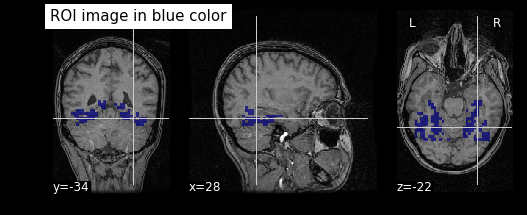

In [23]:
# We make use of previously imported subject data and loading specifically mask and anatomical filenames

# Anatomical image filename
anatomical_filename = data.anat[0]

# Mask image filename
mask_filename = data.mask_vt[0] # visual cortex mask image

# Visualizing the overlay of mask image onto its own anatomical image
plotting.plot_roi(roi_img=mask_filename, bg_img=anatomical_filename,
                  title='ROI image in blue color', dim=-1)